In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import random

## i create a dummy signal  

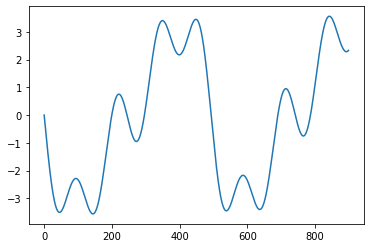

In [2]:
t=np.arange(10000)
omega=2*3.14*2
a=0.1*np.sin(omega*t)
a1=np.sin(omega*t)
b=3*np.sin(2*omega*t)
b1=np.sin(2*omega*t)
c=np.sin(4*omega*t)
d=5*np.sin(8*omega*t)
d1=np.sin(8*omega*t)
e=a+b+c+d/4
plt.plot(e[0:900])
z=np.random.uniform(-0.5,0.5,900).reshape(1,900)


In [3]:
m=e[0:900]+z
m.reshape(1,-1)

array([[ 2.14583528e-01, -5.95957700e-01, -3.79260247e-01,
        -1.79674669e-01, -9.43485505e-01, -3.87314282e-01,
        -1.05317486e+00, -6.95134348e-01, -1.22620427e+00,
        -6.65451180e-01, -1.28715982e+00, -1.61545314e+00,
        -1.23015286e+00, -1.73332397e+00, -1.40606833e+00,
        -1.90168088e+00, -2.12928647e+00, -2.22102743e+00,
        -1.83777213e+00, -2.29518533e+00, -2.25062752e+00,
        -2.37070031e+00, -2.54156115e+00, -2.42289250e+00,
        -2.88060148e+00, -2.62332694e+00, -2.38288098e+00,
        -2.70058234e+00, -2.54059031e+00, -3.08056616e+00,
        -3.12513629e+00, -3.37672304e+00, -3.00477517e+00,
        -3.65823895e+00, -3.53891109e+00, -3.55298027e+00,
        -3.60843600e+00, -3.60172466e+00, -3.38311955e+00,
        -3.36255091e+00, -3.62181834e+00, -3.43334002e+00,
        -3.60200110e+00, -3.24761294e+00, -3.08917263e+00,
        -3.06435008e+00, -3.24837158e+00, -3.88106074e+00,
        -3.56526606e+00, -3.86314179e+00, -3.48175079e+0

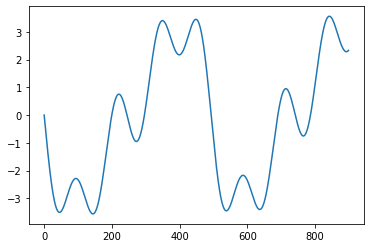

In [4]:

plt.plot(e[0:900])
plt.show()

In [5]:
kk=pd.DataFrame()


In [6]:
kk['a']=a1[0:900]
kk['b']=b1[0:900]
kk['c']=c[0:900]
kk['d']=d1[0:900]
kk['sigint']=m[0:900].reshape(-1,1)

In [7]:
kk.head()

,a,b,c,d,sigint
0,0.000000,0.000000,0.000000,0.000000,0.214584
1,-0.006371,-0.012741,-0.025480,-0.050943,-0.595958
2,-0.012741,-0.025480,-0.050943,-0.101753,-0.379260
3,-0.019111,-0.038214,-0.076373,-0.152300,-0.179675
4,-0.025480,-0.050943,-0.101753,-0.202451,-0.943486


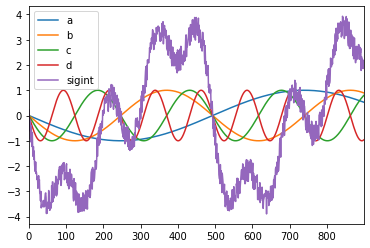

In [8]:
kk.plot()

In [11]:
from sklearn.linear_model import LinearRegression
X=kk[["a","b","c","d"]]
y=kk["sigint"]
X.head()
y.head()
reg = LinearRegression().fit(X, y)
reg.score(X,y)

0.9850751003407852

In [12]:
pred=reg.predict(X)

In [13]:
kk["Predicted"]=pred

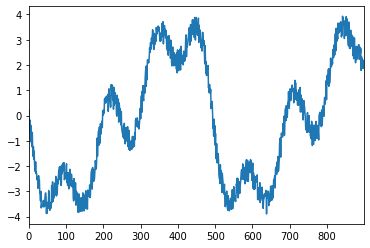

In [14]:
kk["sigint"].plot()

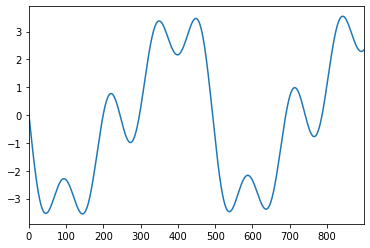

In [15]:
kk["Predicted"].plot()

In [16]:
reg.coef_

array([0.10771296, 2.99252414, 1.02721873, 1.26024761])

___What i am trying to do is create a general formula for a sound signal of an instrument for its one note by using collection of sin wave harmonics___
What i have done:
* created a signal using different amplitudes for sinwaves whose frequecies increase in by 2 every time 
* i have used f 2f 4f and 8f sinwaves with varrying amplitude to generate a wave. I add them and divide resultant vector by 4
* Then i add noise to the resultant wave
* so this somehow represents how a real world arbitary sound wave would look

* now i take a table with vectors of each frequency of sinwave 
* i append the input wave to this 

* Apply least squares linear regression to this to calculate the weights

Observations till  now :

* we get a good waveform which is similar to the input waveform

## Most Important Observation here is that the we obtain a general formula for the input noisy wave and can now generate a wave which is perfect with no noise

In [23]:
import scipy.io.wavfile
a,wave=scipy.io.wavfile.read('flute1.wav', mmap=False)
b=44100/1008
b

43.75

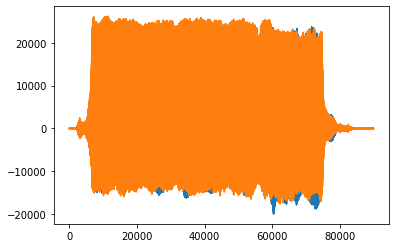

In [24]:
plt.plot(wave)

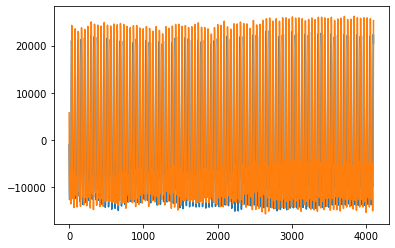

In [25]:
plt.plot(wave[7500:11600])

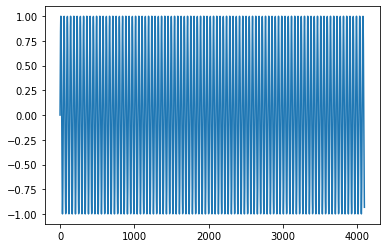

In [26]:
t=np.arange(4100)
omega=2*np.pi/43.75
a=np.sin(omega*t)
# a1=np.sin(omega*t)
b=np.sin(2*omega*t)
# b1=np.sin(2*omega*t)
c=np.sin(3*omega*t)
# d=5*np.sin(8*omega*t)
d=np.sin(4*omega*t)
e=np.sin(5*omega*t)
f=np.cos(omega*t)
g=np.cos(2*omega*t)
h=np.cos(3*omega*t)
i=np.cos(4*omega*t)
j=np.cos(5*omega*t)


plt.plot(a)


In [27]:
sins=pd.DataFrame()

In [28]:
sins["a"]=a
sins["b"]=b
sins["c"]=c
sins["d"]=d
sins["e"]=e
sins["f"]=f
sins["g"]=g
sins["h"]=h
sins["i"]=i
sins["j"]=j

# sins["signal"]=
signal=wave[7500:11600]
sig = np.array(signal[:, 0]).reshape(-1, 1)
print(sig.shape)
sig=sig

sins["sign"]=sig

(4100, 1)


In [29]:
sins.head()

,a,b,c,d,e,f,g,h,i,j,sign
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-981
1,0.143122,0.283298,0.417641,0.543384,0.657939,0.989705,0.959032,0.908612,0.839484,0.753071,-4611
2,0.283298,0.543384,0.758947,0.912324,0.990950,0.959032,0.839484,0.651153,0.409468,0.134233,-7761
3,0.417641,0.758947,0.961536,0.988380,0.834573,0.908612,0.651153,0.274679,-0.152000,-0.550897,-10268
4,0.543384,0.912324,0.988380,0.747136,0.266037,0.839484,0.409468,-0.152000,-0.664672,-0.963963,-11933


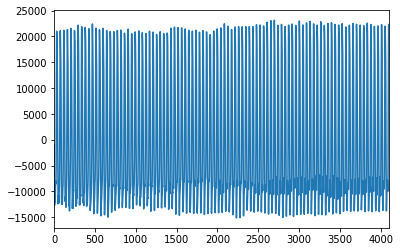

In [30]:
sins["sign"].plot()

In [44]:
from sklearn.linear_model import LinearRegression
X=sins[["a","b","c","d","e","f","g","h","i","j"]]
y=sins[["sign"]]
X.head()
y.head()
reg = LinearRegression().fit(X, y)
reg.score(X,y)

0.9176524356433949

In [45]:
pred=reg.predict(X)

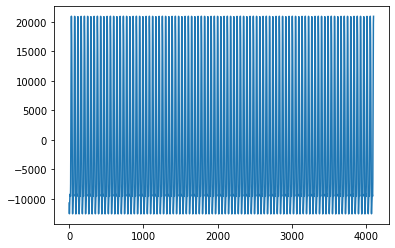

In [46]:
plt.plot(pred)

In [47]:
reg.coef_

array([[-15252.90413258,   2373.52173171,   -847.65279123,
           391.2560477 ,     96.89394892,  -4404.55788507,
         -5769.2697631 ,    220.06034552,   -895.71495539,
           128.2734352 ]])

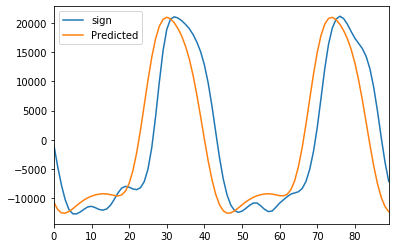

In [48]:
sins["Predicted"]=pred
sins[["sign","Predicted"]][0:90].plot()

In [49]:
a=sins["Predicted"]

In [50]:
zz=44100*3/4100

In [51]:
sigout=np.array(a)
signalorig=np.array(sins["sign"])
for _ in range(int(zz)):
    sigout=np.append(sigout,a)
    signalorig=np.append(signalorig,np.array(sins["sign"]))

In [52]:
sigout

array([-10722.60142758, -11937.19051138, -12496.71034254, ...,
        19779.88950588,  20746.83617284,  20923.6983102 ])

In [53]:
scaledsig = np.int16(sigout/np.max(np.abs(sigout)) * 32767)
scipy.io.wavfile.write("FluteReproduced.wav", 44100, scaledsig)
scipy.io.wavfile.write("Flute.wav", 44100, signalorig)
